<a href="https://colab.research.google.com/github/nnh92/Kmeans-Clustering/blob/main/Trial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'numpy.ndarray'>


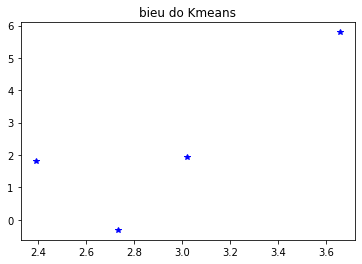

[3 3 1 1 3 3 1 1 1 3 1 0 1 3 1 3 1 1 3 3 3 3 3 0 3 3 0 1 3 3 1 1 0 3 1 1 3
 3 1 1 3 1 1 3 3 3 1 1 2 1]


In [1]:
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
N = 50
A = np.random.multivariate_normal([1,1],[[3,0],[0,3]],N)

original_label = np.asarray([0]*len(A[:,0]))
X = A
K = 4

original_label_K = np.asarray([0]*K)
#print(original_label)

def kmeans_display(X, label):
  X0 = X[label == 0,:]
  X1 = X[label == 1,:]
  X2 = X[label == 2,:]
  X3 = X[label == 3,:]
  plt.plot(X0[:,0],X0[:,1],'b*',markersize = 6)
  plt.plot(X1[:,0],X1[:,1],'ro',markersize = 6)
  plt.plot(X2[:,0],X2[:,1],'y*',markersize = 6)
  plt.plot(X3[:,0],X3[:,1],'ko',markersize = 6)

  plt.title('bieu do Kmeans')
  plt.show()

#kmeans_display(X,original_label)

def kmeans_int_centers(X,k):
  #print(X[np.random.choice(X.shape[0],k, replace=False)])
  return X[np.random.choice(X.shape[0],k,replace = False)]

#print(X.shape[0])
TR = kmeans_int_centers(X,K)
#print(type(TR))
kmeans_display(TR,original_label_K)

def kmeans_assign_centers(X, centers):
  D = cdist(X, centers)
  #print(D)
  return np.argmin(D, axis = 1)

print(kmeans_assign_centers(X, TR))
#print(X.shape[0])

def kmeans(X, K):
  centers = kmeans_int_centers(X, K)
  labels = []
  it = 0
  while True:
    labels.append(kmeans_assign_centers(X,centers[-1]))
